In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("hiring.csv")

In [3]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [4]:
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [5]:
df.shape


(8, 4)

In [6]:

# word to number

In [7]:
pip install Word2Number

Note: you may need to restart the kernel to use updated packages.


In [8]:
from  word2number import w2n

In [9]:
df['experience']=df.experience.fillna("Zero")

In [10]:
df.experience

0      Zero
1      Zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [11]:
df.experience =df.experience.apply(w2n.word_to_num)

In [12]:
df=df.rename(columns={'test_score(out of 10)':'test_score','interview_score(out of 10)':'interview_score'})

In [13]:
df.isnull().sum()

experience         0
test_score         1
interview_score    0
salary($)          0
dtype: int64

In [14]:
df[df['test_score'].isnull()]

,experience,test_score,interview_score,salary($)
6,10,NaN,7,72000


In [15]:
df=df.rename(columns = {'salary($)':'salary'})

In [16]:
df[df['salary']>70000]

,experience,test_score,interview_score,salary
6,10,NaN,7,72000
7,11,7.0,8,80000


In [17]:
med=df.test_score.median()

In [18]:
med

8.0

In [19]:
df.iloc[6,1]=med   # df['test_score']=df['test_score'].fillna(med)

In [20]:
df.iloc[6,1]

8.0

C:\Users\dubba\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


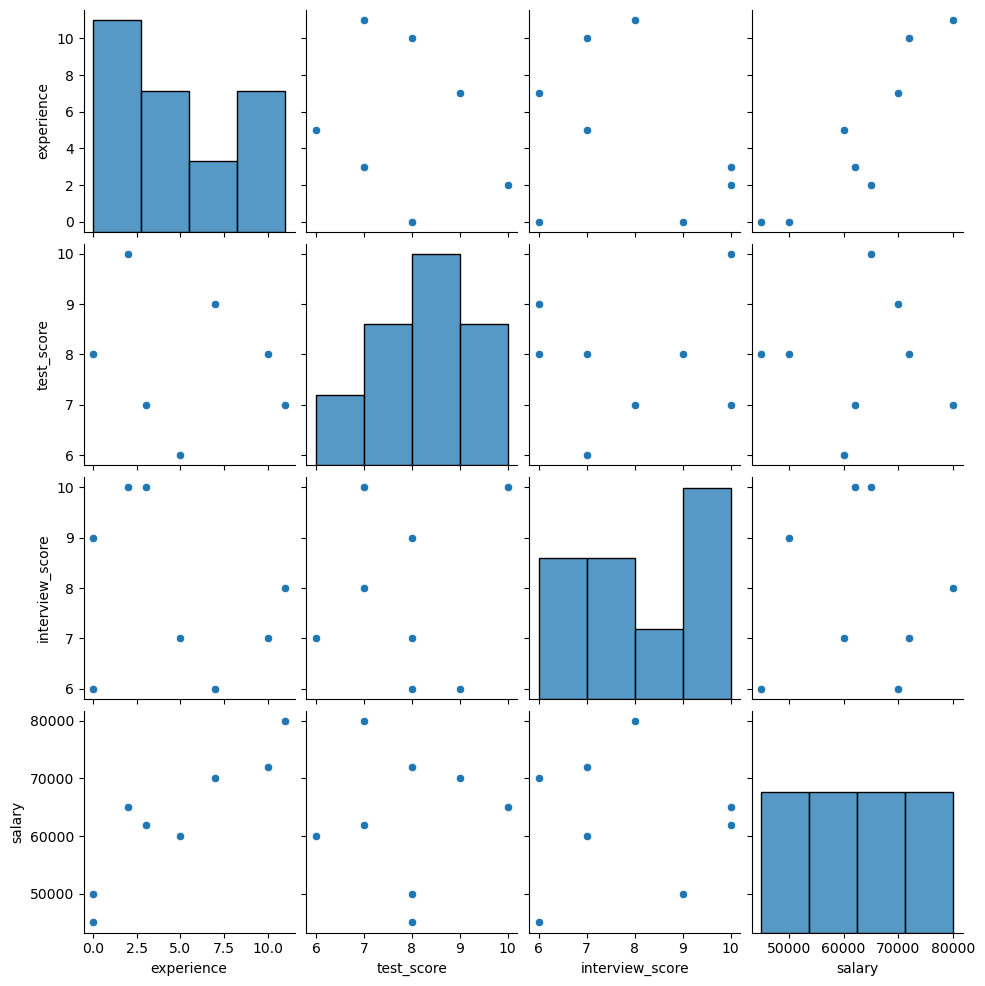

In [21]:
sns.pairplot(df)

In [22]:
X=df.iloc[:,:-1].values
X

array([[ 0.,  8.,  9.],
       [ 0.,  8.,  6.],
       [ 5.,  6.,  7.],
       [ 2., 10., 10.],
       [ 7.,  9.,  6.],
       [ 3.,  7., 10.],
       [10.,  8.,  7.],
       [11.,  7.,  8.]])

In [23]:
y=df.iloc[:,[3]].values

In [24]:
y

array([[50000],
       [45000],
       [60000],
       [65000],
       [70000],
       [62000],
       [72000],
       [80000]], dtype=int64)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=1/4,random_state=10)

In [26]:
len(X_train)

6

In [27]:
len(X_test)

2

In [28]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [39]:
y_pred =reg.predict(X_test)

In [40]:
y_pred

array([[57455.49012816],
       [63712.15794943]])

In [41]:
reg.score(X_test,Y_test)

0.3493545891913713

In [32]:
reg.intercept_

array([15565.29269138])

In [33]:
reg.coef_

array([[2847.24627641, 2062.69483893, 2182.54243159]])

In [34]:
 reg.predict([[15,9,8]])

array([[94298.57984067]])

In [35]:
reg.predict([[2,9,6]])

array([[52919.29338414]])

In [36]:
from sklearn import metrics


In [42]:
print("mae:" , metrics.mean_absolute_error(Y_test,y_pred))

mae: 1916.1759612054084


In [44]:
print("mse:",metrics.mean_squared_error(Y_test,y_pred))

mse: 4066533.8175539295


In [46]:
print("rmse:",np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

rmse: 2016.5648557767563
